In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [53]:
data = pd.read_csv('election2024.csv')

In [54]:
data.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [55]:
data.drop(columns=['id','job_type','company_type'],inplace=True)

In [56]:
data.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  weight1              1600 non-null   float64
dtypes: float64(2), object(11)
memory usage: 162.6+ KB


1600X15
sex: male/female
age: min-18, max-90

federal_district: ['central', 'far eastern', 'north caucasian', 'northwestern', 'siberian', 'southern', 'ural', 'volga']

type_of_city: ['city with population of 1 million and higher', 'city with population of 100-500k', 'city with population of 50-100k', 'city with population of 500-950k', 'city with population of less than 50k', 'settlement', 'village']

knows_election_date: ['named correct date', 'named correct year', 'not sure or no answer', 'wrong answer']

will_vote: ['definitely no', 'definitely yes', 'likely no', 'likely yes', 'not sure', 'struggle to answer']

candidate: 7-['Putin', 'Davankov', 'will not take part', 'spoilt vote',
       'Kharitonov', 'struggle to answer', 'Slutskiy']

television_usage: ['does not watch', 'less than 4 hours a day', 'once half a year', 'over 4 hours a day', 'several times a month', 'several times a week']

internet_usage: ['does not use internet', 'less than 4 hours a day', 'once half a year', 'over 4 hours a day', 'several times a month', 'several times a week']

education: ['academic degree', 'bachelor degree', 'college', 'incomplete school education', 'no school education', 'school']

income: ['hard to say', 'high', 'low', 'medium', 'very high', 'very low']

'employment': ['employed pensioner', 'employed student', 'entrepreneur', 'hard to say', 'parental leave', 'refused to answer', 'self-employed', 'unemployed', 'unemployed pensioner', 'unemployed student', 'work for hire']


job_type:[nan, 'commercial organization', 'law enforcement agency',
       'government agency', 'government, management, judicial bodies',
       'non-profit agency', 'hard to say']
  
company_type: 12 - ['farming', 'trade', 'law enforcement agency', nan,
       'tech, programming, communications', 'refused to answer',
       'industry, manufacturing', 'other',
       'housing and communal services', 'finances', 'education',
       'healthcare', 'state administration', 'culture, sports',
       'transportation, storage',
       'Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...',
       'catering, restaurants', 'construction, architecture',
       'hard to say', 'entertainment, tourism', 'social services',
       'media']

In [58]:
numerical_col = ['age','weight1']
categorical_col = ['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type']
name_col = ['candidate']

In [59]:
data.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'weight1'],
      dtype='object')

In [60]:
data.sample()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
531,male,36.0,volga,city with population of 1 million and higher,named correct date,not sure,Putin,does not watch,less than 4 hours a day,bachelor degree,medium,work for hire,0.964365


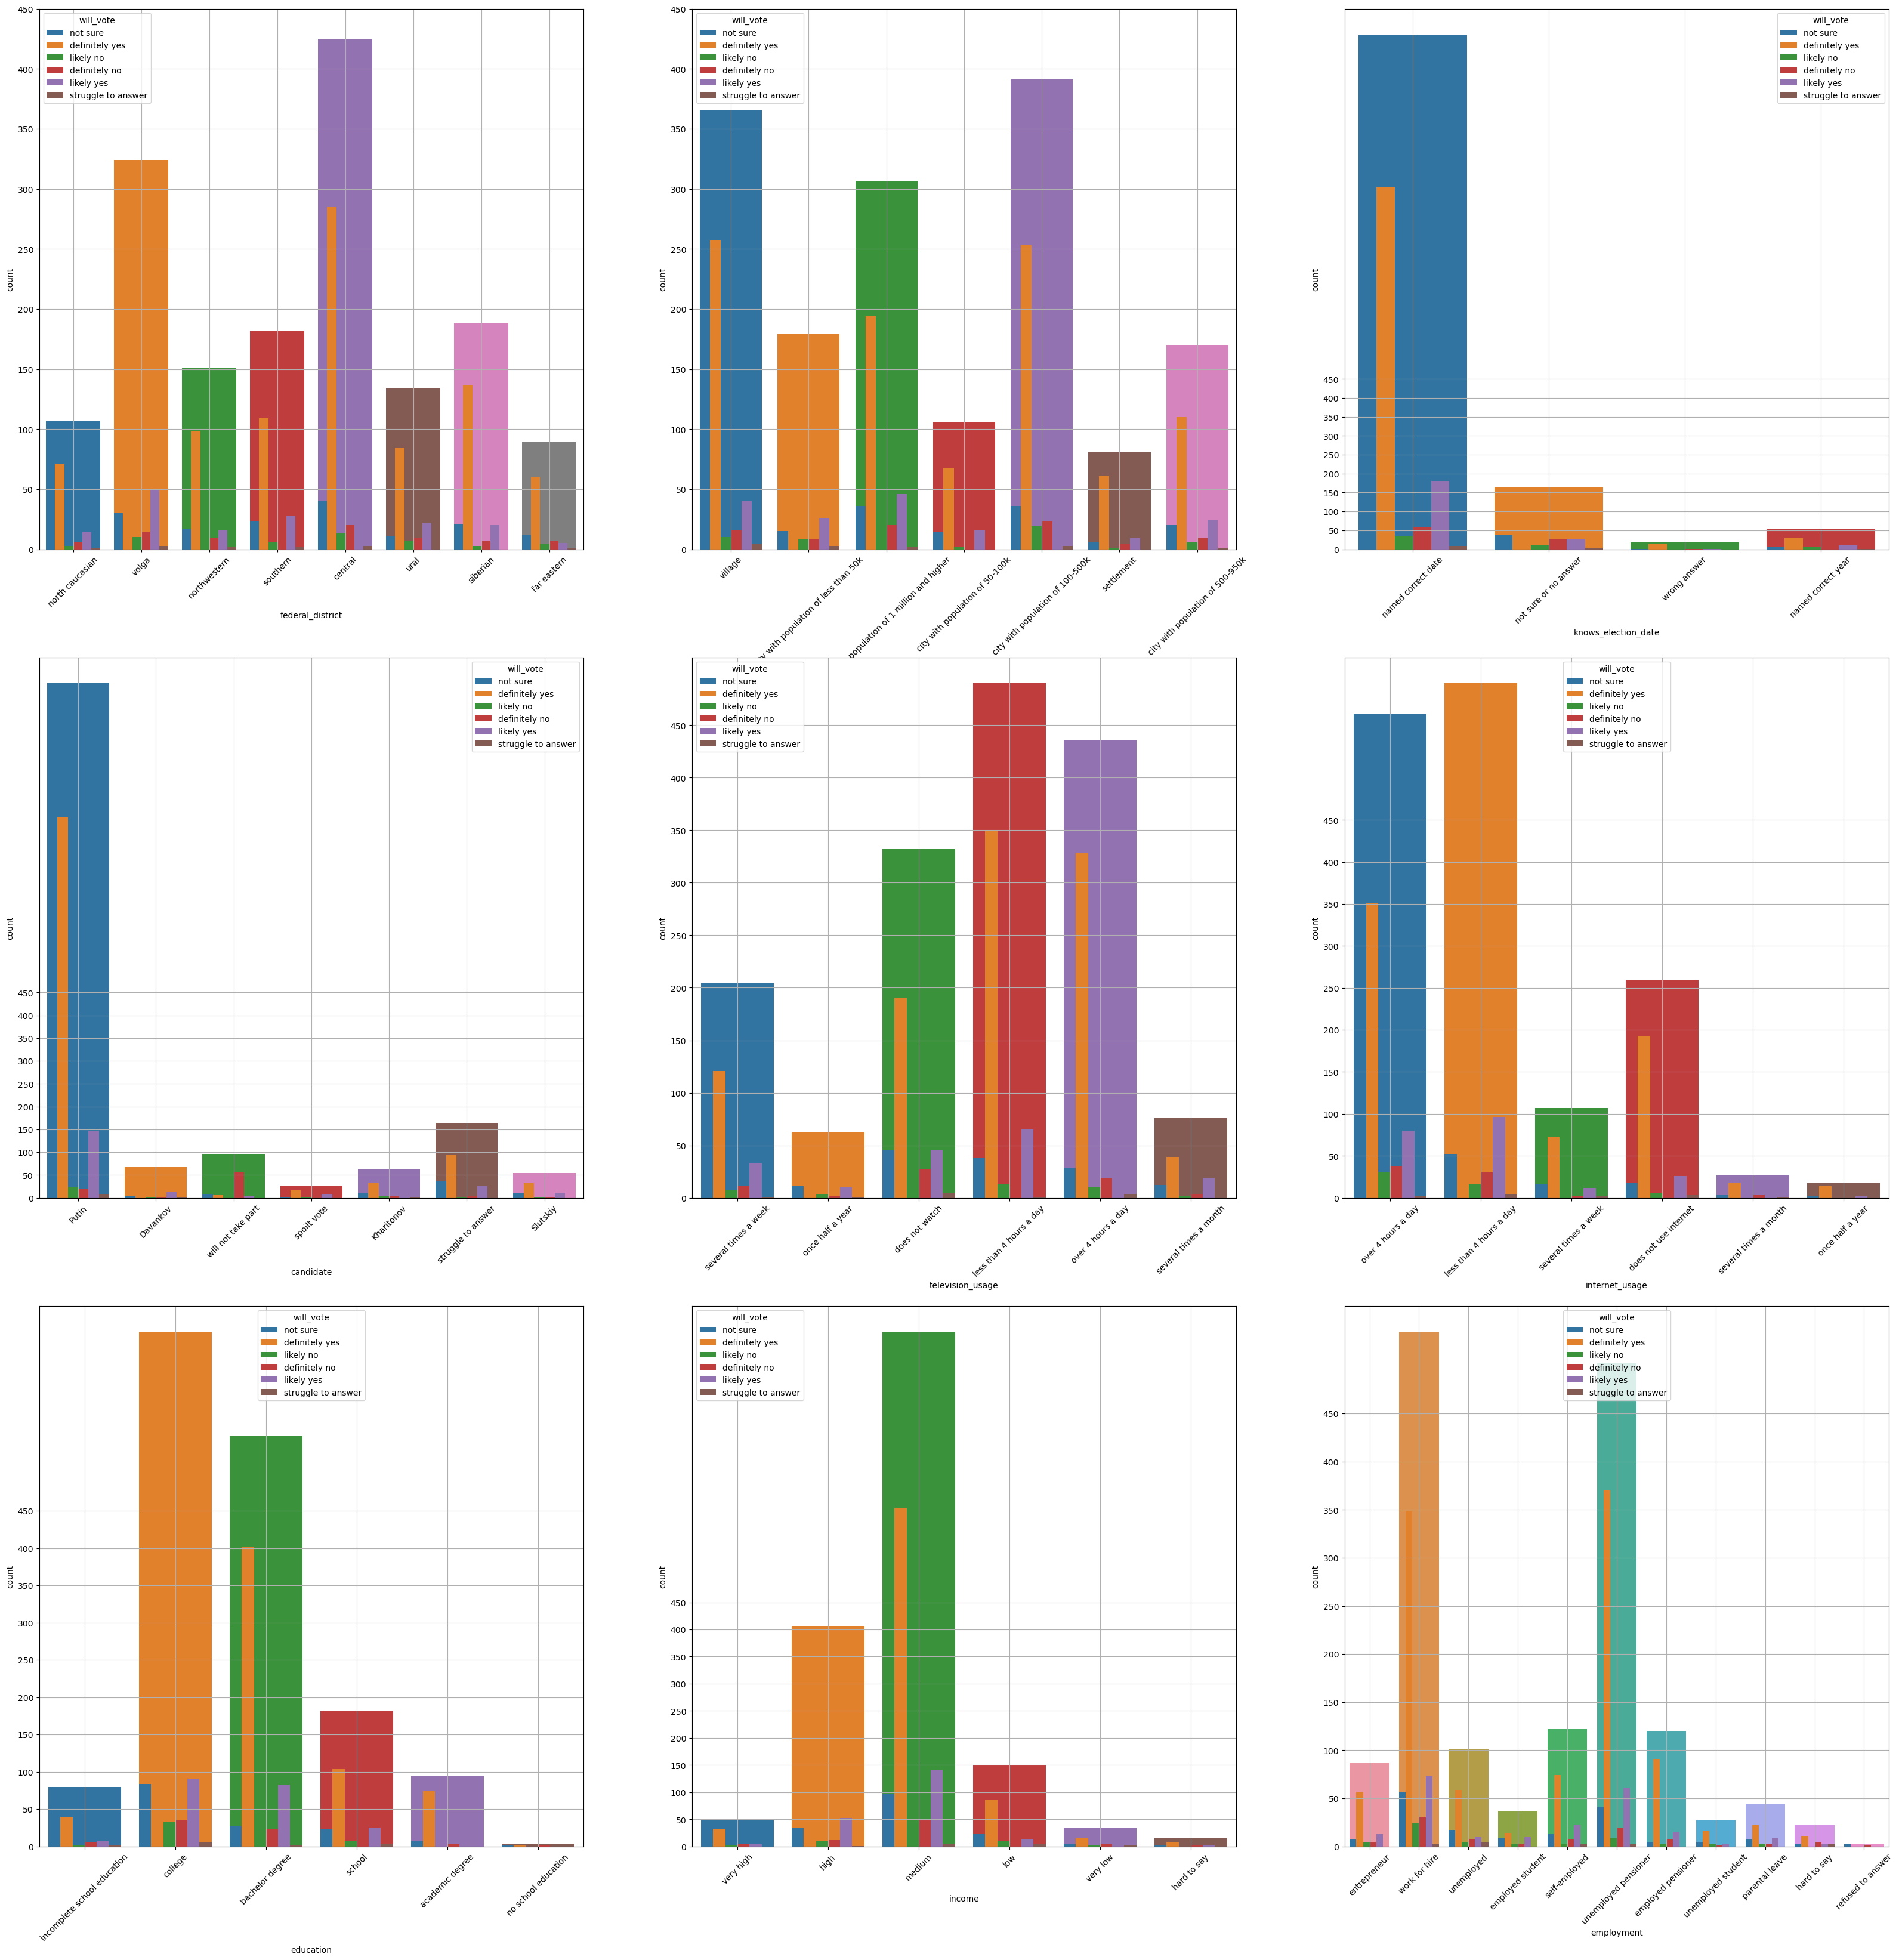

In [84]:
plt.figure(figsize=(40,40))
columns = ['federal_district', 'type_of_city', 'knows_election_date', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment']
i=1
for col in columns:
    plt.subplot(3,3,i)
    sns.countplot(data[col])
    sns.countplot(data[col],hue=data['will_vote'])
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0,500,50))
    plt.grid()
    i+=1
    

plt.show()

In [66]:
data.sample()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
239,male,47.0,central,city with population of 100-500k,named correct date,definitely no,will not take part,less than 4 hours a day,less than 4 hours a day,college,high,work for hire,0.576228


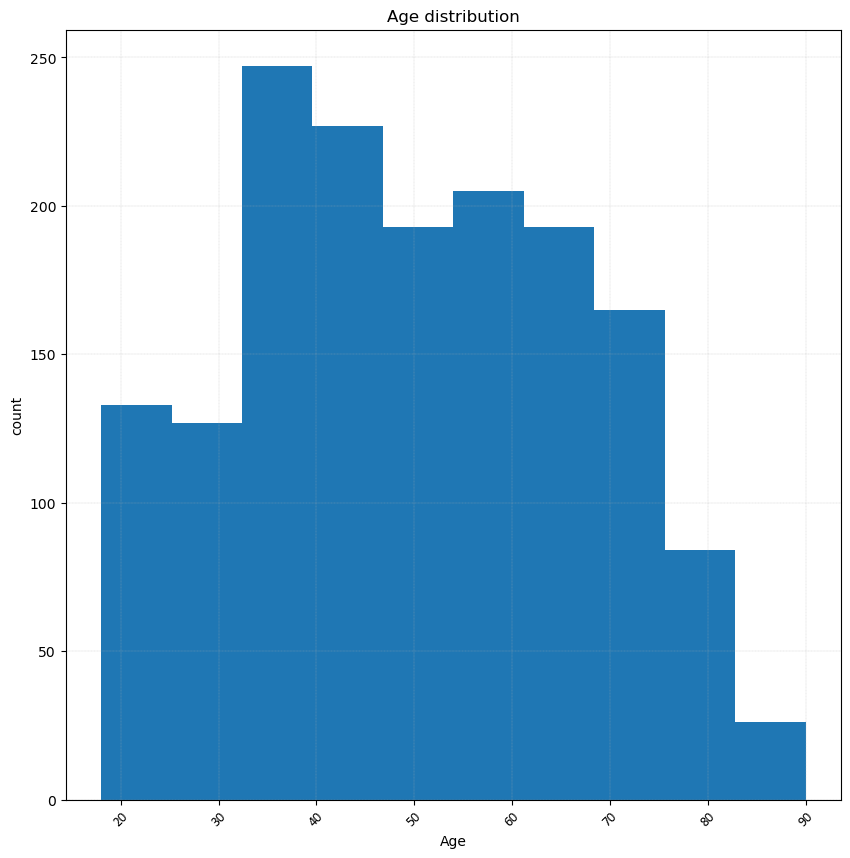

In [83]:
plt.figure(figsize=(10,10))
plt.title('Age distribution')
plt.hist(data['age'],bins=10)
plt.xlabel('Age')
plt.ylabel('count')

plt.xticks(rotation=45,font='calibri')

plt.grid(linestyle='--',linewidth=0.2)

plt.show()

In [86]:
data['age_group']=pd.cut(data['age'],bins=[10,21,31,41,51,61,71,81,91],labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90'],right=False)
data.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1,age_group
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172,10-20
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172,21-30
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691,10-20
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628,21-30
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015,21-30


In [144]:
overallcol= ['federal_district', 'type_of_city', 'knows_election_date', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment']
i=1
plt.figure(figsize=(100,100))
for over in overallcol:
    for cat in data[over].unique():
        df = (data[data[over]==cat]['will_vote'].value_counts(normalize=True)*100).reset_index()
        plt.subplot(8,8,i)
        sns.barplot(data=df,x='will_vote',y='proportion')
        plt.title(over+" "+cat)
        plt.xticks(rotation=30)
        plt.grid(linewidth=0.2)
        i+=1
plt.show()